In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

C:\Users\oekpom\AppData\Local\Programs\Python\Python36-32\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)
C:\Users\oekpom\AppData\Local\Programs\Python\Python36-32\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)


In [2]:
ticker = "PG"
mydata = pd.DataFrame()
mydata[ticker]=wb.DataReader(ticker, data_source = "yahoo", start="2007-1-1")["Adj Close"]

In [3]:
log_returns = np.log(1 + mydata.pct_change())

In [4]:
log_returns.tail()

,PG
Date,
2021-02-12,-0.005548
2021-02-16,0.002348
2021-02-17,0.004213
2021-02-18,0.008295
2021-02-19,-0.018781


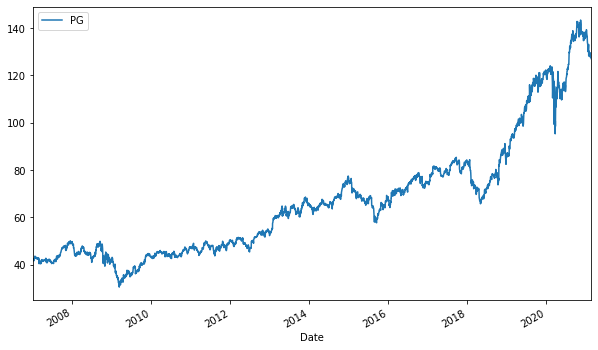

In [6]:
mydata.plot(figsize=(10,6))

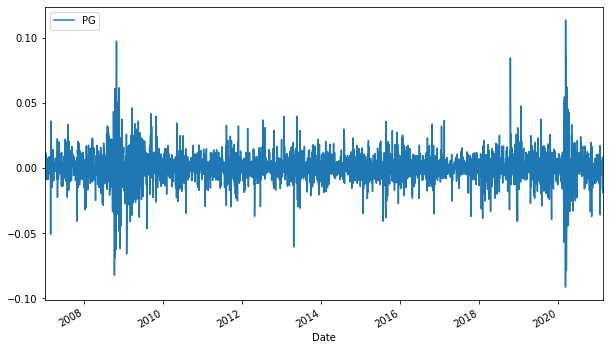

In [7]:
log_returns.plot(figsize=(10,6))

In [9]:
u = log_returns.mean()
u

PG    0.000309
dtype: float64

In [10]:
var = log_returns.var()
var

PG    0.000141
dtype: float64

In [11]:
drift = u - (0.5 * var)
drift

PG    0.000238
dtype: float64

In [12]:
stdev = log_returns.std()
stdev

PG    0.011867
dtype: float64

In [13]:
type(drift)

pandas.core.series.Series

In [14]:
type(stdev)

pandas.core.series.Series

In [15]:
np.array(drift)

array([0.0002384])

In [16]:
drift.values

array([0.0002384])

In [17]:
stdev.values

array([0.0118672])

In [18]:
norm.ppf(0.99)

2.3263478740408408

In [19]:
x = np.random.rand(10,2)
x

array([[0.94644972, 0.36989619],
       [0.97800756, 0.05014478],
       [0.28972416, 0.57937925],
       [0.30801189, 0.5651555 ],
       [0.27890646, 0.12615095],
       [0.00432154, 0.71407274],
       [0.47848938, 0.60160674],
       [0.79573302, 0.73923164],
       [0.11804732, 0.0469909 ],
       [0.45679927, 0.95792304]])

In [20]:
norm.ppf(x)

array([[ 1.61136332, -0.3321283 ],
       [ 2.01423494, -1.64345148],
       [-0.55419073,  0.20030571],
       [-0.50149359,  0.16405353],
       [-0.58609316, -1.14477613],
       [-2.62585855,  0.56532236],
       [-0.05394528,  0.25750815],
       [ 0.82647631,  0.64097839],
       [-1.18480479, -1.67475756],
       [-0.10850068,  1.72707657]])

In [21]:
z = norm.ppf(np.random.rand(10,2))
z

array([[ 0.31059099,  0.88162385],
       [ 0.3235348 ,  0.52438672],
       [ 0.22041148,  0.15732858],
       [-0.96454205, -0.83486868],
       [ 1.43169721, -0.61010085],
       [ 1.8983424 ,  0.6354088 ],
       [ 0.02636779, -0.43852371],
       [ 0.68615128,  0.804394  ],
       [-1.43552348,  1.41623559],
       [-0.03864426,  1.13992041]])

In [22]:
t_intervals = 1000
iterations = 10

In [33]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [34]:
daily_returns

array([[1.01046909, 0.99854524, 0.99128988, ..., 0.99810064, 0.99665007,
        0.98977055],
       [0.99545479, 1.00386924, 1.00732337, ..., 0.99832905, 1.00647373,
        0.99145241],
       [0.99123991, 1.00629666, 1.00839757, ..., 1.00167238, 1.01685709,
        1.01210449],
       ...,
       [0.99084464, 1.00020589, 1.00548234, ..., 1.00185937, 0.99586554,
        0.98865572],
       [0.99187762, 0.99158298, 1.0110562 , ..., 1.0043921 , 0.99302502,
        0.99393707],
       [0.99301953, 1.01212786, 0.99119037, ..., 1.00769528, 1.00051321,
        1.0041784 ]])

In [35]:
S0 = mydata.iloc[-1]
S0

PG    127.120003
Name: 2021-02-19 00:00:00, dtype: float64

In [36]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
price_list[0] = S0
price_list

array([[127.12000275, 127.12000275, 127.12000275, ..., 127.12000275,
        127.12000275, 127.12000275],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [38]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [39]:
price_list

array([[127.12000275, 127.12000275, 127.12000275, ..., 127.12000275,
        127.12000275, 127.12000275],
       [126.54221612, 127.61185993, 128.05094893, ..., 126.90759134,
        127.94294364, 126.03343294],
       [125.43369504, 128.41538865, 129.12626626, ..., 127.11982872,
        130.09968962, 127.55900319],
       ...,
       [103.40521072, 177.17243358, 179.21882888, ..., 151.20871614,
        158.40149277, 215.26412739],
       [102.56531397, 175.68116982, 181.20030879, ..., 151.87283957,
        157.29664607, 213.95899706],
       [101.84935948, 177.8118063 , 179.60400155, ..., 153.04154287,
        157.37737188, 214.85300327]])

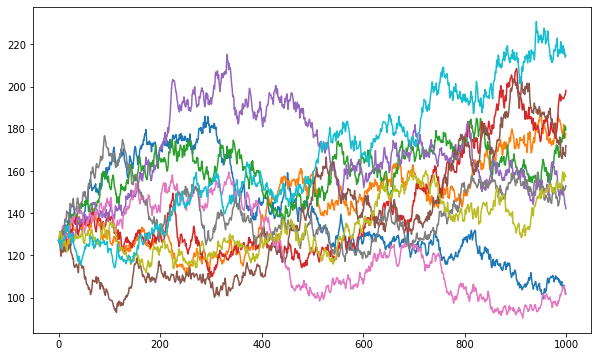

In [40]:
plt.figure(figsize=(10,6))
plt.plot(price_list)